In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
mnist_train = pd.read_csv('mnist_train.csv', header=None)
mnist_test = pd.read_csv('mnist_test.csv', header=None)

In [4]:
cols = ["label"]

for i in range(784):
    cols.append(f"px_{i+1}")

In [5]:
mnist_train.columns = cols
mnist_test.columns = cols

In [6]:
image_size = 28

In [7]:
train_label = mnist_train['label'].values
test_label = mnist_test['label'].values

In [8]:
train_images = mnist_train.values[:, 1:]
test_images = mnist_test.values[:, 1:]

In [9]:
train_images = train_images.reshape(60000, 28, 28)
test_images = test_images.reshape(10000, 28, 28)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn_classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors =3)

In [35]:
knn_classifier = knn_classifier.fit(train_images.reshape(60000, 784), train_label)

In [20]:
image_id = 77

In [21]:
prediction = knn_classifier.predict(test_images[image_id].reshape(1,784))

In [22]:
prediction

array([2], dtype=int64)

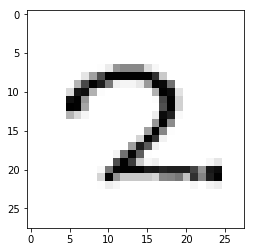

In [23]:
plt.imshow(test_images[image_id], cmap='Greys')

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
all_predictions = knn_classifier.predict(test_images.reshape(10000,784))

In [37]:
accuracy_score(test_label, all_predictions)*100

97.05

In [27]:
cm = confusion_matrix(test_label, all_predictions)

In [28]:
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

In [16]:
# for i, (real, pred) in enumerate(zip(test_label, all_predictions)):
#     if real == 4 and real != pred:
#         print('Prediction ' + str(pred))
#         plt.imshow(test_images[i], cmap='Greys')
#         plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier

In [26]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(80,80,80,), acti) #чем выше число юнитов, тем выше точность. 
#activationn лучше всего relu

In [27]:
nn_classifier = nn_classifier.fit(train_images.reshape(60000, 784), train_label)

In [48]:
image_id = 77

In [49]:
prediction = nn_classifier.predict(test_images[image_id].reshape(1,784))

In [50]:
prediction

array([2], dtype=int64)

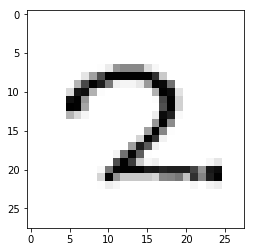

In [51]:
plt.imshow(test_images[image_id], cmap='Greys')

In [28]:
all_predictions2 = nn_classifier.predict(test_images.reshape(10000,784))

In [29]:
accuracy_score(test_label, all_predictions2)*100

97.17

In [68]:
cm = confusion_matrix(test_label, all_predictions2)

In [69]:
cm

array([[ 972,    0,    1,    1,    0,    1,    2,    1,    2,    0],
       [   1, 1114,    4,    4,    1,    1,    1,    0,    9,    0],
       [   3,    2,  999,    6,    4,    0,    1,    5,   11,    1],
       [   0,    2,    6,  977,    0,   10,    0,    4,    8,    3],
       [   1,    1,    2,    1,  947,    0,   11,    2,    3,   14],
       [   2,    0,    0,   11,    0,  858,    8,    1,    9,    3],
       [   9,    2,    0,    0,    4,    4,  935,    0,    4,    0],
       [   1,    5,   12,   12,    2,    1,    0,  986,    3,    6],
       [   4,    0,    7,    5,    4,    8,    4,    3,  934,    5],
       [   5,    3,    0,   17,   16,    5,    1,    8,   11,  943]],
      dtype=int64)

In [79]:
# for i, (real, pred) in enumerate(zip(test_label, all_predictions)):
#     if real == 4 and real != pred:
#         print('Prediction ' + str(pred))
#         plt.imshow(test_images[i], cmap='Greys')
#         plt.show()